In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [154]:
import warnings
warnings.filterwarnings(action="ignore")

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [66]:
df=pd.read_csv('Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### EDA -exploratrory data analysis

In [67]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [72]:
Geography_unique=df['Geography'].unique()
Geography_unique

array(['France', 'Spain', 'Germany'], dtype=object)

In [73]:
Geography_unique_Num=[1,2,3]
df.replace(Geography_unique,Geography_unique_Num,inplace=True)

In [74]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0


In [75]:
Gender=df['Gender'].unique()
Gender

array(['Female', 'Male'], dtype=object)

In [76]:
Gender_num=[1,2]
df.replace(Gender,Gender_num,inplace=True)

In [77]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0


In [78]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
Gender,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,0.007382,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

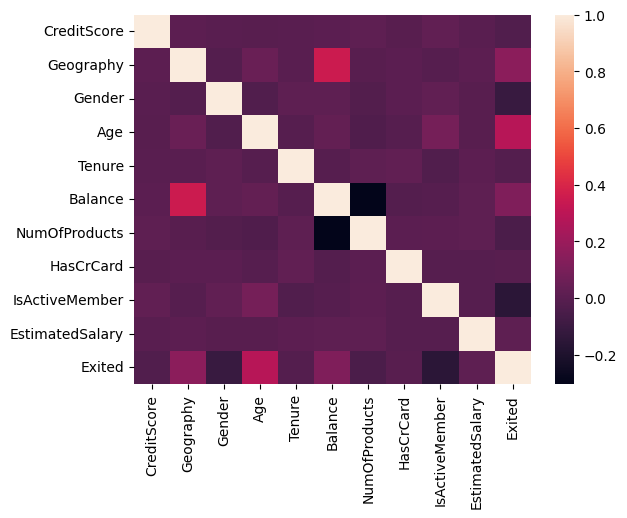

In [79]:
sns.heatmap(df.corr())

In [80]:
##Encoding cat to the numeric technique
#df['name colme of '].value_counts()
#from sklearn.preprocessing import LabelEncoder
#lb=LabelEncoder()
#df['name of col']=lb.fit_transform(df['name of col'])
#df


#another method
#df=pd.get_dummies(df,columns=['name of col'],dtype=int)

In [81]:
#split the data into x and y
x=df.drop('Exited',axis=1)
y=df['Exited']

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=123456)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [84]:
y_prediction = model.predict(x_test)

In [85]:
y_prediction

array([0, 0, 1, ..., 0, 0, 0], shape=(2000,))

In [86]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8369,684,3,2,37,1,126817.13,2,1,1,29995.83
5395,589,3,2,48,5,126111.61,1,0,1,133961.19
7996,717,1,1,22,5,112465.06,1,1,1,92977.75
4157,850,2,2,62,5,0.00,2,1,1,180243.56
3324,808,2,2,47,8,139196.00,1,0,1,74028.36
...,...,...,...,...,...,...,...,...,...,...
8336,786,3,1,33,0,122325.58,1,0,0,34712.34
8221,443,3,2,59,4,110939.30,1,1,0,72846.58
7049,602,1,1,39,6,154121.32,2,1,0,176614.86
986,566,1,2,36,1,142120.91,1,1,0,79616.37


In [87]:
y_test

8369    1
5395    0
7996    0
4157    0
3324    0
       ..
8336    1
8221    1
7049    1
986     0
7917    0
Name: Exited, Length: 2000, dtype: int64

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# create a model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid={
    'n_neighbors':[3,5,7,9]
}

# setup the Grid Search
knn_cv = GridSearchCV(knn,param_grid,cv=5)

knn_cv.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [89]:
#print("Best parameter :",knn_cv.best_params_)
#print("Best cross validation score :",knn_cv.best_score_)

#best_knn = knn_cv.best_estimator_
#y_prediction = best_knn.predict(x_test)
#test_accuracy = best_knn.score(x_test,y_test)

#print("Test accuracy score :", test_accuracy)

In [90]:
y_pred = model.predict(x_test)
y_true = y_test

In [91]:
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)
f1 = f1_score(y_true,y_pred)
#roc_auc_score = roc_auc_score(y_test,y_pred)

print(confusion_matrix(y_true,y_pred))
print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")
print(f"roc_auc_score = {roc_auc_score}")


[[1477  108]
 [ 386   29]]
accuracy = 0.753
precision = 0.2116788321167883
recall = 0.06987951807228916
f1 = 0.10507246376811594
roc_auc_score = <function roc_auc_score at 0x00000282BEB5B520>


In [92]:
df=pd.read_csv('claimants.csv')
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


##EDA

In [93]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [95]:
df.isna()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1335,False,False,False,False,True,False
1336,False,False,False,False,False,False
1337,False,False,False,False,False,False
1338,False,False,False,False,False,False


In [96]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [99]:
x=df.drop('ATTORNEY',axis=1)
y=df['ATTORNEY']

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [102]:
y_pred=model.predict(x_test)

In [103]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [104]:
X_data = df[['CLMAGE','LOSS']]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()



#from sklearn.preprocessing import MinMaxScaler
#sc=MinMaxScaler()
#x_std=sc.fit_transform(df[['CLMAGE','LOSS']])
x_std=sc.fit_transform(X_data)
x_std

array([[ 1.05048704,  2.96924493],
       [-0.51942439, -0.28328699],
       [-1.15720091, -0.33687653],
       ...,
       [ 0.51082998, -0.35894281],
       [-1.01002171, -0.06491676],
       [ 0.0692924 , -0.30267857]], shape=(1096, 2))

In [105]:
x1=pd.DataFrame(x_std) #when we use scaling it convert column name also in 0 and 1
x1.columns=X_data.columns #to solve this we reassign the name to column 
x1
# purpose to use== to scaling the data into 0-1 && to increse the accuracy

,CLMAGE,LOSS
0,1.050487,2.969245
1,-0.519424,-0.283287
2,-1.157201,-0.336877
3,0.118352,-0.364865
4,0.069292,-0.364770
...,...,...
1091,-0.617544,-0.362668
1092,0.854248,-0.014480
1093,0.510830,-0.358943
1094,-1.010022,-0.064917


In [106]:
df_remaining=df.drop(X_data,axis=1)
df=pd.concat([df_remaining,x1],axis=1)
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,0.0,1.0,0.0,1.050487,2.969245
1,1.0,1.0,0.0,0.0,-0.519424,-0.283287
2,1.0,0.0,1.0,0.0,-1.157201,-0.336877
3,0.0,0.0,1.0,1.0,0.118352,-0.364865
4,1.0,0.0,1.0,0.0,0.069292,-0.364770
...,...,...,...,...,...,...
1049,NaN,NaN,NaN,NaN,0.069292,-0.011614
1055,NaN,NaN,NaN,NaN,-0.911902,-0.364579
1059,NaN,NaN,NaN,NaN,-0.911902,-0.276314
1086,NaN,NaN,NaN,NaN,0.216472,-0.317294


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=123456)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [109]:
y_pred=model.predict(x_test)

In [110]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print(confusion_matrix(y_test,y_pred))
print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")
print(f"roc_auc_score = {roc_auc}")


[[85 31]
 [37 67]]
accuracy = 0.6909090909090909
precision = 0.6836734693877551
recall = 0.6442307692307693
f1 = 0.6633663366336634
roc_auc_score = 0.6884946949602123


In [111]:
df=pd.read_csv('framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [112]:
df.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [113]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [114]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


<Axes: >

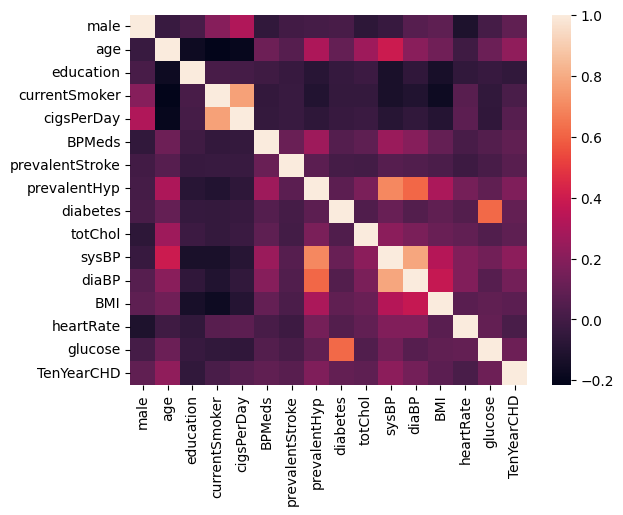

In [115]:
sns.heatmap(df.corr())

In [116]:
x_data = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(x_data)
x_std

array([[-1.23428297, -0.75546531, -0.93526124, ...,  0.28661362,
         0.3427348 , -0.20724014],
       [-0.41766419, -0.75546531,  0.29831087, ...,  0.71805418,
         1.59024711, -0.24899166],
       [-0.18434454,  0.9222398 ,  0.18616795, ..., -0.11295917,
        -0.07310263, -0.49950076],
       ...,
       [ 0.28229477, -0.75546531,  0.72445397, ..., -1.06163812,
         0.3427348 ,  1.04530539],
       [-1.11762315, -0.75546531, -1.15954708, ..., -0.04922363,
        -0.73844253, -0.41599773],
       [-1.23428297,  1.76109236, -0.91283266, ..., -1.19891466,
         0.75857224, -0.08198559]], shape=(4240, 8))

In [117]:
x1=pd.DataFrame(x_std)
x1.columns=x_data.columns
x1

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234283,-0.755465,-0.935261,-1.196267,-1.083027,0.286614,0.342735,-0.207240
1,-0.417664,-0.755465,0.298311,-0.515399,-0.159355,0.718054,1.590247,-0.248992
2,-0.184345,0.922240,0.186168,-0.220356,-0.243325,-0.112959,-0.073103,-0.499501
3,1.332233,1.761092,-0.262404,0.800946,1.016227,0.681284,-0.904778,0.878299
4,-0.417664,1.173896,1.083311,-0.106878,0.092555,-0.662065,0.758572,0.126772
...,...,...,...,...,...,...,...,...
4235,-0.184345,0.922240,0.253454,-0.061487,-0.915087,-0.931716,0.675405,0.168524
4236,-0.650984,0.502814,-0.598832,-0.265747,0.344466,-1.627904,0.841740,NaN
4237,0.282295,-0.755465,0.724454,0.051991,0.008585,-1.061638,0.342735,1.045305
4238,-1.117623,-0.755465,-1.159547,0.392425,1.268138,-0.049224,-0.738443,-0.415998


In [118]:
df_remaining=df.drop(x_data,axis=1)
df=pd.concat([df_remaining,x1],axis=1)
df

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,4.0,0,0.0,0,0,0,0,-1.234283,-0.755465,-0.935261,-1.196267,-1.083027,0.286614,0.342735,-0.207240
1,0,2.0,0,0.0,0,0,0,0,-0.417664,-0.755465,0.298311,-0.515399,-0.159355,0.718054,1.590247,-0.248992
2,1,1.0,1,0.0,0,0,0,0,-0.184345,0.922240,0.186168,-0.220356,-0.243325,-0.112959,-0.073103,-0.499501
3,0,3.0,1,0.0,0,1,0,1,1.332233,1.761092,-0.262404,0.800946,1.016227,0.681284,-0.904778,0.878299
4,0,3.0,1,0.0,0,0,0,0,-0.417664,1.173896,1.083311,-0.106878,0.092555,-0.662065,0.758572,0.126772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,2.0,1,NaN,0,0,0,0,-0.184345,0.922240,0.253454,-0.061487,-0.915087,-0.931716,0.675405,0.168524
4236,0,1.0,1,0.0,0,0,0,0,-0.650984,0.502814,-0.598832,-0.265747,0.344466,-1.627904,0.841740,NaN
4237,0,2.0,0,0.0,0,0,0,0,0.282295,-0.755465,0.724454,0.051991,0.008585,-1.061638,0.342735,1.045305
4238,1,3.0,0,0.0,0,1,0,0,-1.117623,-0.755465,-1.159547,0.392425,1.268138,-0.049224,-0.738443,-0.415998


In [119]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']
x

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,4.0,0,0.0,0,0,0,-1.234283,-0.755465,-0.935261,-1.196267,-1.083027,0.286614,0.342735,-0.207240
1,0,2.0,0,0.0,0,0,0,-0.417664,-0.755465,0.298311,-0.515399,-0.159355,0.718054,1.590247,-0.248992
2,1,1.0,1,0.0,0,0,0,-0.184345,0.922240,0.186168,-0.220356,-0.243325,-0.112959,-0.073103,-0.499501
3,0,3.0,1,0.0,0,1,0,1.332233,1.761092,-0.262404,0.800946,1.016227,0.681284,-0.904778,0.878299
4,0,3.0,1,0.0,0,0,0,-0.417664,1.173896,1.083311,-0.106878,0.092555,-0.662065,0.758572,0.126772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,2.0,1,NaN,0,0,0,-0.184345,0.922240,0.253454,-0.061487,-0.915087,-0.931716,0.675405,0.168524
4236,0,1.0,1,0.0,0,0,0,-0.650984,0.502814,-0.598832,-0.265747,0.344466,-1.627904,0.841740,NaN
4237,0,2.0,0,0.0,0,0,0,0.282295,-0.755465,0.724454,0.051991,0.008585,-1.061638,0.342735,1.045305
4238,1,3.0,0,0.0,0,1,0,-1.117623,-0.755465,-1.159547,0.392425,1.268138,-0.049224,-0.738443,-0.415998


In [120]:
df.isna().sum()

male                 0
education          105
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
TenYearCHD           0
age                  0
cigsPerDay          29
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [124]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [126]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix=\n",cm)

acc=accuracy_score(y_test,y_pred)
print(f"accuracy_score:{acc*100:.2f}")

pre=precision_score(y_test,y_pred,average='weighted')
print(f"precision_score:{pre*100:.2f}")

recall=recall_score(y_test,y_pred,average='weighted')
print(f"recall_score:{recall*100:.2f}")

f1=f1_score(y_test,y_pred,average='weighted')
print(f"f1 score:{f1*100:.2f}")

Confusion Matrix=
 [[1067   10]
 [ 187    8]]
accuracy_score:84.51
precision_score:78.86
recall_score:84.51
f1 score:78.67


In [129]:
df=pd.read_csv('glass.csv')
df.head(50)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [131]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [132]:
df.isna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [133]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [134]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

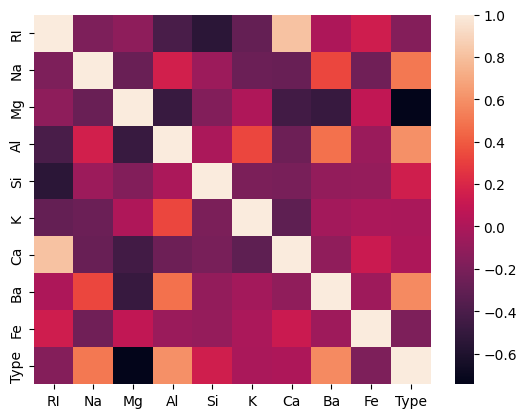

In [135]:
sns.heatmap(df.corr())

In [136]:
df.head(1000)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#DATA SCALING 

In [137]:
X_data = df[['Na','Mg','Si','Ca']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_data)
X_std

array([[0.43759398, 1.        , 0.35178571, 0.30855019],
       [0.47518797, 0.80178174, 0.52142857, 0.22304833],
       [0.42105263, 0.79064588, 0.56785714, 0.21840149],
       [0.37293233, 0.82182628, 0.5       , 0.25929368],
       [0.38195489, 0.80623608, 0.58392857, 0.24535316],
       [0.30977444, 0.80400891, 0.56428571, 0.24535316],
       [0.38646617, 0.80178174, 0.58571429, 0.25464684],
       [0.36390977, 0.80400891, 0.6125    , 0.26115242],
       [0.49774436, 0.79732739, 0.40535714, 0.26672862],
       [0.34135338, 0.80178174, 0.56785714, 0.2760223 ],
       [0.29924812, 0.77060134, 0.60535714, 0.2472119 ],
       [0.3112782 , 0.81514477, 0.57142857, 0.29089219],
       [0.32330827, 0.76391982, 0.61964286, 0.24349442],
       [0.32030075, 0.79287305, 0.60714286, 0.27416357],
       [0.28270677, 0.79955457, 0.62142857, 0.28531599],
       [0.31278195, 0.78841871, 0.6125    , 0.27509294],
       [0.29323308, 0.81737194, 0.58928571, 0.30390335],
       [0.54586466, 0.85746102,

In [138]:
X_data

,Na,Mg,Si,Ca
0,13.64,4.49,71.78,8.75
1,13.89,3.60,72.73,7.83
2,13.53,3.55,72.99,7.78
3,13.21,3.69,72.61,8.22
4,13.27,3.62,73.08,8.07
...,...,...,...,...
209,14.14,0.00,72.61,9.18
210,14.92,0.00,73.06,8.40
211,14.36,0.00,73.42,8.44
212,14.38,0.00,73.61,8.48


In [139]:
x1 = pd.DataFrame(X_std)
x1.columns = X_data.columns
x1

,Na,Mg,Si,Ca
0,0.437594,1.000000,0.351786,0.308550
1,0.475188,0.801782,0.521429,0.223048
2,0.421053,0.790646,0.567857,0.218401
3,0.372932,0.821826,0.500000,0.259294
4,0.381955,0.806236,0.583929,0.245353
...,...,...,...,...
209,0.512782,0.000000,0.500000,0.348513
210,0.630075,0.000000,0.580357,0.276022
211,0.545865,0.000000,0.644643,0.279740
212,0.548872,0.000000,0.678571,0.283457


In [140]:
df.drop(['Na','Mg','Si','Ca'],axis=1,inplace=True)

In [141]:
a=pd.concat([df,x1],axis=1)
a

,RI,Al,K,Ba,Fe,Type,Na,Mg,Si,Ca
0,1.52101,1.10,0.06,0.00,0.0,1,0.437594,1.000000,0.351786,0.308550
1,1.51761,1.36,0.48,0.00,0.0,1,0.475188,0.801782,0.521429,0.223048
2,1.51618,1.54,0.39,0.00,0.0,1,0.421053,0.790646,0.567857,0.218401
3,1.51766,1.29,0.57,0.00,0.0,1,0.372932,0.821826,0.500000,0.259294
4,1.51742,1.24,0.55,0.00,0.0,1,0.381955,0.806236,0.583929,0.245353
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,2.88,0.08,1.06,0.0,7,0.512782,0.000000,0.500000,0.348513
210,1.51685,1.99,0.00,1.59,0.0,7,0.630075,0.000000,0.580357,0.276022
211,1.52065,2.02,0.00,1.64,0.0,7,0.545865,0.000000,0.644643,0.279740
212,1.51651,1.94,0.00,1.57,0.0,7,0.548872,0.000000,0.678571,0.283457


In [142]:
x=df.drop('Type',axis=1)
y=df['Type']

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=12345)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [145]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [146]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix=\n",cm)

acc=accuracy_score(y_test,y_pred)
print(f"accuracy_score:{acc*100:.2f}")

pre=precision_score(y_test,y_pred,average='weighted')
print(f"precision_score:{pre*100:.2f}")

recall=recall_score(y_test,y_pred,average='weighted')
print(f"recall_score:{recall*100:.2f}")

f1=f1_score(y_test,y_pred,average='weighted')
print(f"f1 score:{f1*100:.2f}")

roc_auc=roc_auc_score(y_test,y_prob,average='weighted',multi_class='ovr')
print(f"roc_auc_score:{roc_auc*100:.2f}")

Confusion Matrix=
 [[12  4  0  0  0  0]
 [ 6  7  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  1  1  0]
 [ 1  0  0  0  0  4]]
accuracy_score:55.81
precision_score:53.01
recall_score:55.81
f1 score:52.44
roc_auc_score:75.00


In [157]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [159]:
df=pd.read_csv("Zoo.csv")
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [160]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [162]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [163]:
df.shape

(101, 17)

In [164]:
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [165]:
x = df.drop(['type'], axis=1)
y = df['type']


In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [167]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [168]:
y_pred=model.predict(x_test)
y_proba=model.predict_proba(x_test)

In [169]:
pred=model.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])
pred

array([1])

In [170]:
pred=model.predict([[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0]])
pred

array([7])

In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix=\n",cm)

acc=accuracy_score(y_test,y_pred)
print(f"accuracy_score:{acc*100:.2f}")

pre=precision_score(y_test,y_pred,average='weighted')
print(f"precision_score:{pre*100:.2f}")

recall=recall_score(y_test,y_pred,average='weighted')
print(f"recall_score:{recall*100:.2f}")

f1=f1_score(y_test,y_pred,average='weighted')
print(f"f1 score:{f1*100:.2f}")

Confusion Matrix=
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
accuracy_score:95.24
precision_score:92.06
recall_score:95.24
f1 score:93.33
